In [1]:
import cv2
import matplotlib.pyplot as plt
import supervision as sv
import torch
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry


In [2]:
# config
CHECKPOINT = "../model/sam_vit_h_4b8939.pth"
MODEL_TYPE = "vit_h"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


In [3]:
# read image
img = cv2.imread("../data/uber.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [4]:
# generate mask
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT)
sam.to(device=DEVICE)
mask_generator = SamAutomaticMaskGenerator(sam)
result = mask_generator.generate(img)


In [5]:
# create annotated image
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
detections = sv.Detections.from_sam(result)
annotated_image = mask_annotator.annotate(img, detections)


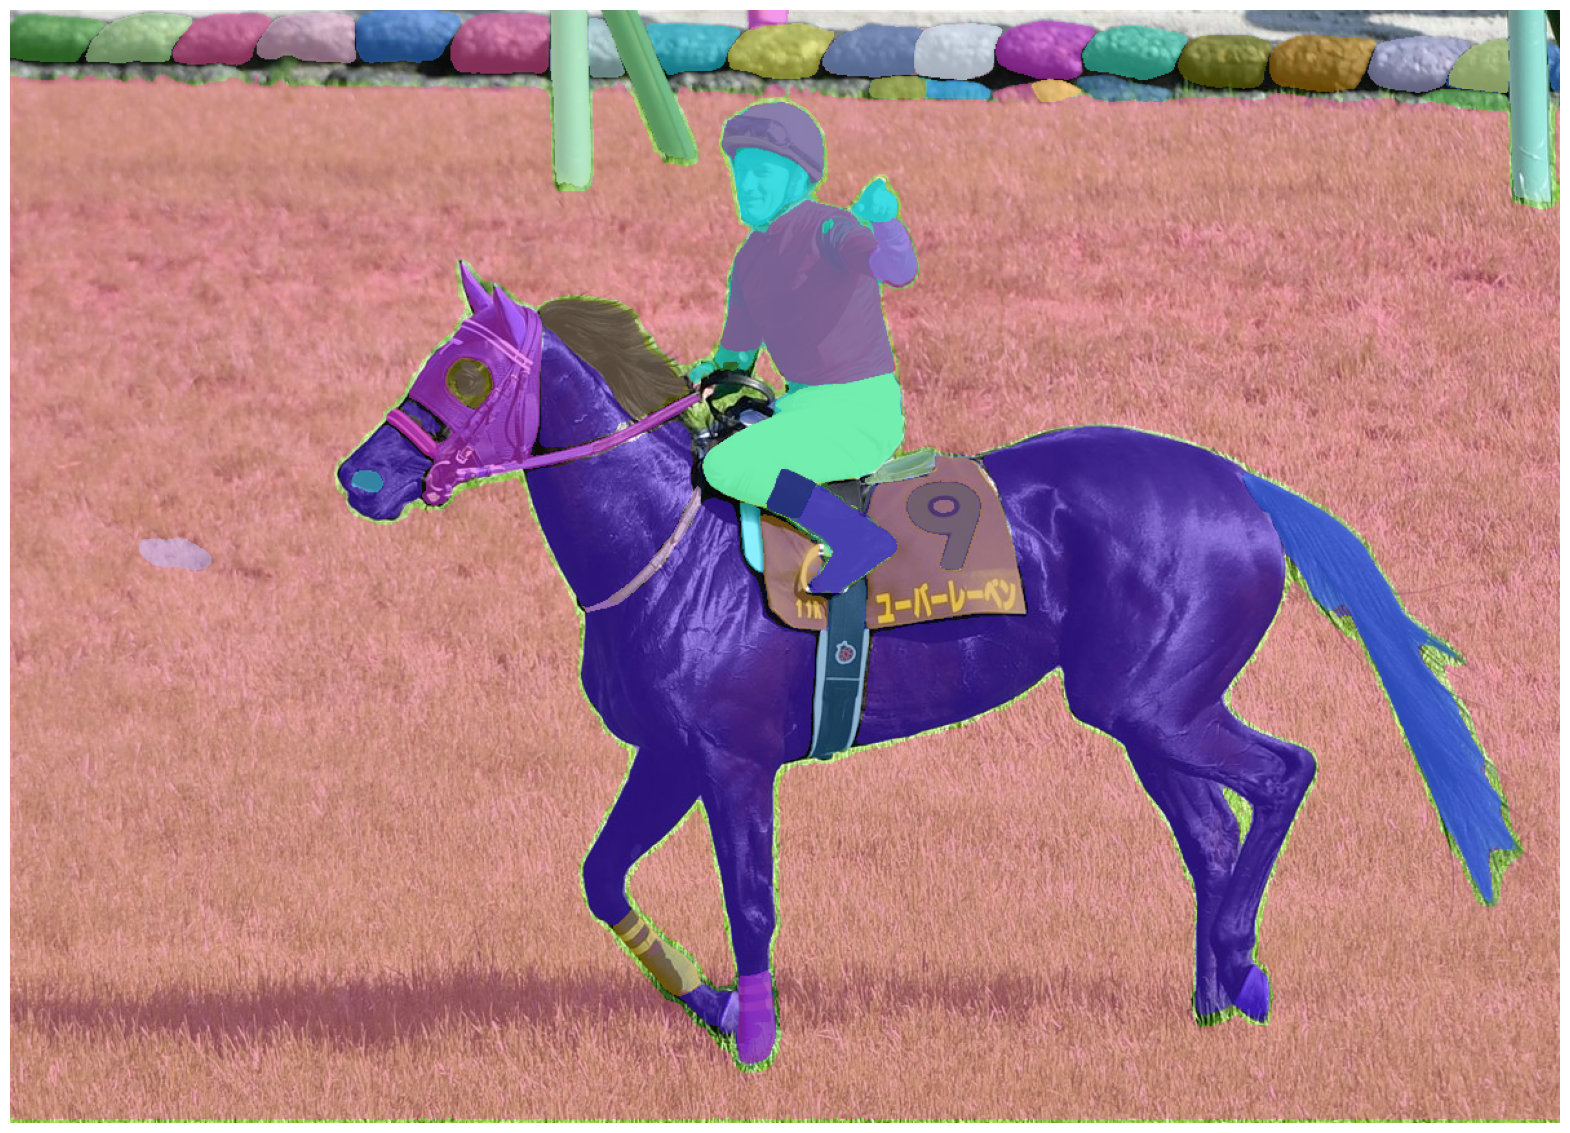

In [6]:
# show result
plt.figure(figsize=(20, 20))
plt.imshow(annotated_image)
plt.axis("off")
plt.show()


In [7]:
result[0]


{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 698922,
 'bbox': [0, 50, 1199, 809],
 'predicted_iou': 1.0298656225204468,
 'point_coords': [[618.75, 67.34375]],
 'stability_score': 0.9750356674194336,
 'crop_box': [0, 0, 1200, 862]}